<img style="display: block; margin: 0 auto" src="https://images.squarespace-cdn.com/content/v1/645a878d9740963714b8f343/3efb24e3-9fb9-4bc7-b41e-7f36742ae747/2-2.jpg?format=1500w" alt="Lonely Octopus Logo">

**Please create a copy of the notebook in your gdrive to be able to edit it.**

**You can make a copy from the menu: File > Save a copy in Drive**

#  Should we buy this stock?

You’re a financial analyst to an important investor who is interested in a particular stock (maybe because he read r/wallstreetbets). He wants to know if the particular stock behaves independently to the overall stock market.

Your goal is not to forecast the stock market prices, but to compare the company's stock prices to the US market. This is a much more actionable analysis since it identifies when a stock deviates from the market and thus may present as an opportunity.

Perform your analysis in the following order:

> 1) **Exploratory Data Analysis** <br>
> 2) **Statistics and Probability**<br>
> 3) **Machine Learning**<br>

You can perform this analysis on **many companies** falling in the same group (for example FAANG) and compare them against each other.

# **Pre-requisite Actions**

In [1]:
# install the yahoo finance API package
!pip install yfinance

In [84]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf

# Extra required pkgs:
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set()

## **Get to know the Data**
Describe a company using the `yfinance` API, you can use the `.info` attribute of a `Ticker` object.<br>

This attribute provides a wealth of information about the company, including its business sector, full-time employees, business summary, and more.

In [3]:
msft = yf.Ticker("MSFT")
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [4]:
# Check data types
# Count missing values in each column

# Reference: https://pypi.org/project/yfinance/
# Get the historical market data and describe statistical values:
hist = msft.history(period='max')

# Show data types
print('Data types:\n',hist.dtypes)

# Count missing values
print('\n\nMissing values count:\n',hist.isnull().sum())

Data types:
 Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


Missing values count:
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


* Example Trend:
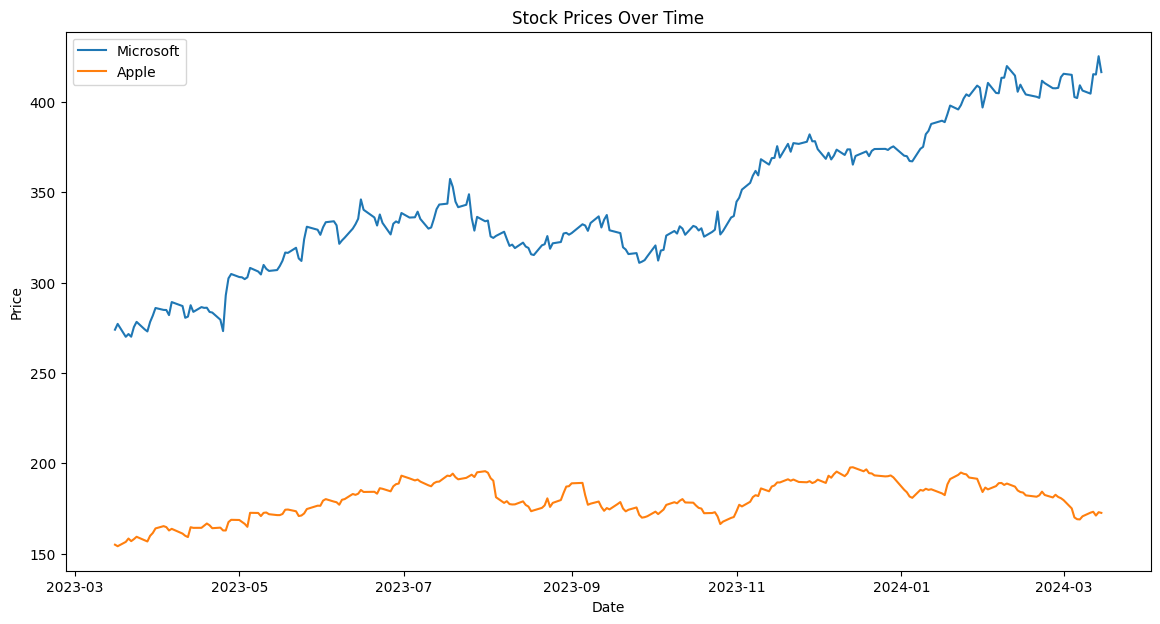

## **Download the Dataset:**

 >* **Financial API Source**: Describe the companies by utilizing the commands available in the API (https://pypi.org/project/yfinance/)<br>
 >  Please refer to [this tutorial](https://youtu.be/ucKK528ApCw) here if you'd like more context

  >* **Download recent data for US returns** : https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [9]:
# Upload the us market data:
from google.colab import files
uploaded = files.upload()

Saving F-F_Research_Data_Factors_daily.CSV to F-F_Research_Data_Factors_daily.CSV


In [10]:
# Preprocessing the file:
raw_data = pd.read_csv('F-F_Research_Data_Factors_daily.CSV', skiprows=4)
raw_data.tail(), raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25691 entries, 0 to 25690
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25691 non-null  object 
 1   Mkt-RF      25690 non-null  float64
 2   SMB         25690 non-null  float64
 3   HML         25690 non-null  float64
 4   RF          25690 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1003.7+ KB


(                             Unnamed: 0  Mkt-RF   SMB   HML     RF
 25686                          20240226   -0.26  1.00 -0.11  0.021
 25687                          20240227    0.27  1.19 -0.45  0.021
 25688                          20240228   -0.26 -0.85  0.00  0.021
 25689                          20240229    0.54 -0.34  0.98  0.021
 25690  Copyright 2024 Kenneth R. French     NaN   NaN   NaN    NaN,
 None)

In [11]:
# Unnamed: 0: Appears to be dates in the format YYYYMMDD.
# Mkt-RF: Market return minus the risk-free rate.
# SMB: Small minus big capitalization stocks returns.
# HML: High minus low book-to-market stocks returns.
# RF: Risk-free rate of return.

# Rename the first unnamed column to 'Date':
raw_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Remove rows with non-numeric entries in the 'Date' column:
raw_data_structured = raw_data.iloc[:-2]

# Convert the 'Date' column to datetime format again:
raw_data_structured['Date'] = pd.to_datetime(raw_data_structured['Date'], format='%Y%m%d')

# Recheck for missing values:
missing_data_updated = raw_data_structured.isnull().sum()

# Display the cleaned data and updated missing values:
us_market_data = raw_data_structured
us_market_data.info(), missing_data_updated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25689 entries, 0 to 25688
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    25689 non-null  datetime64[ns]
 1   Mkt-RF  25689 non-null  float64       
 2   SMB     25689 non-null  float64       
 3   HML     25689 non-null  float64       
 4   RF      25689 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1003.6 KB


<ipython-input-11-cbb2dd07d395>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_structured['Date'] = pd.to_datetime(raw_data_structured['Date'], format='%Y%m%d')


(None,
 Date      0
 Mkt-RF    0
 SMB       0
 HML       0
 RF        0
 dtype: int64)

# **Exploratory Data Analysis**
The EDA section lays the foundation for our analysis by visualizing and understanding the data at a fundamental level. We start by fetching historical stock data for Facebook and Microsoft using the `yfinance` library, providing us with a rich dataset encompassing several years of stock prices. The initial tasks involve plotting the closing prices and calculating percentage changes to visualize trends and volatility over time. We further delve into trend analysis by examining moving averages, which helps smooth out short-term fluctuations and highlight longer-term trends in stock performance.

Comparative analysis against the US market growth, derived from the provided CSV file, offers insights into how these companies' stocks have moved in relation to the broader market. Dimensionality reduction techniques such as Principal Component Analysis (PCA) are employed to identify underlying patterns and reduce the complexity of the stock data, facilitating a clearer understanding of the factors driving stock performance.

### **Data Retrieval and Visualization**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


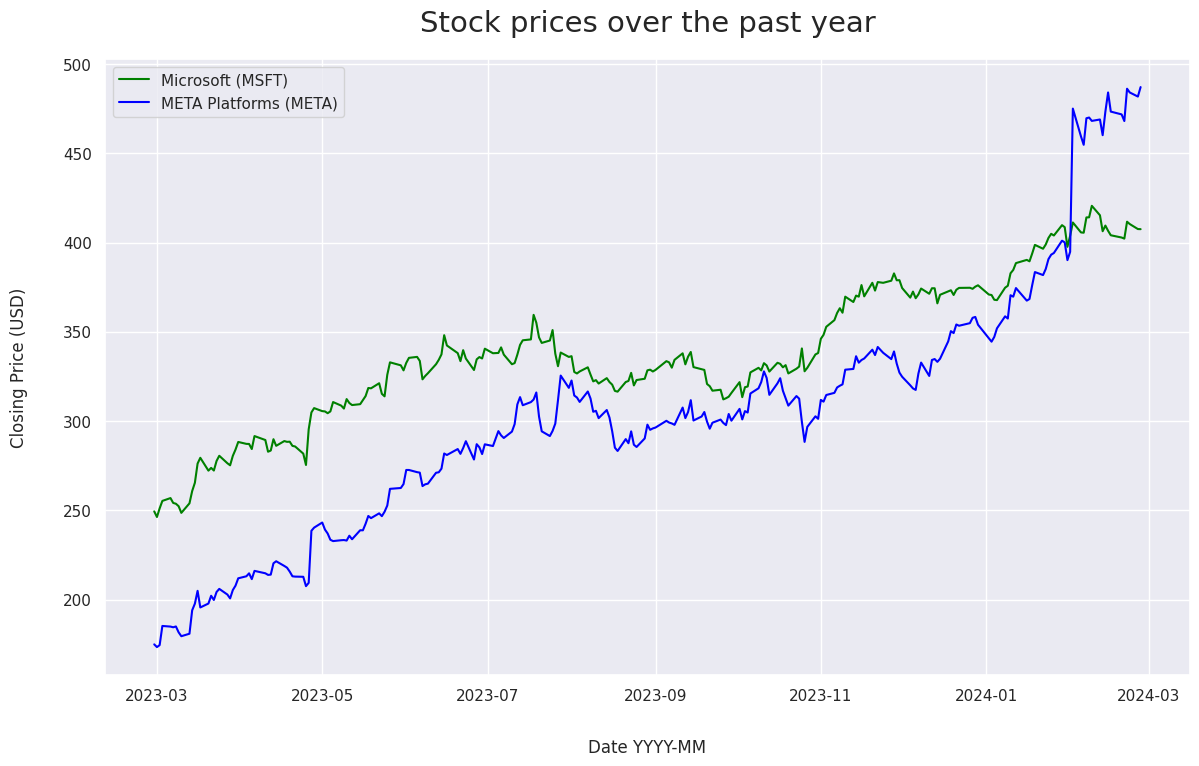

In [12]:
# Fetch stock data for Facebook (FB) and Microsoft (MSFT) using yfinance
# Hints: Use yf.download(tickers, start=us_market_data.index.min(), end=us_market_data.index.max())

# Each call is made to make it easier to track any processing:
msft_data = yf.download('MSFT', start=us_market_data['Date'].min(), end=us_market_data['Date'].max())
meta_data = yf.download('META', start=us_market_data['Date'].min(), end=us_market_data['Date'].max())

# Visualize the stock prices of FB and MSFT over the past year using line charts
# Plot 1 plot with both FB and MSFT

# Filter the last year's data:
end_date = us_market_data['Date'].max()
start_date = end_date - pd.DateOffset(years=1)

msft_year_data = msft_data.loc[start_date:end_date]
meta_year_data = meta_data.loc[start_date:end_date]


fig, ax = plt.subplots(figsize=(14,8))

ax.set_title('Stock prices over the past year', pad=20, fontsize=21)
ax.set_xlabel('Date YYYY-MM', labelpad=25)
ax.set_ylabel('Closing Price (USD)', labelpad=25)
ax.plot(msft_year_data['Close'], label='Microsoft (MSFT)', color='green')
ax.plot(meta_year_data['Close'], label='META Platforms (META)', color='blue')
ax.legend()

# Visualize your findings

### **Trend Analysis**

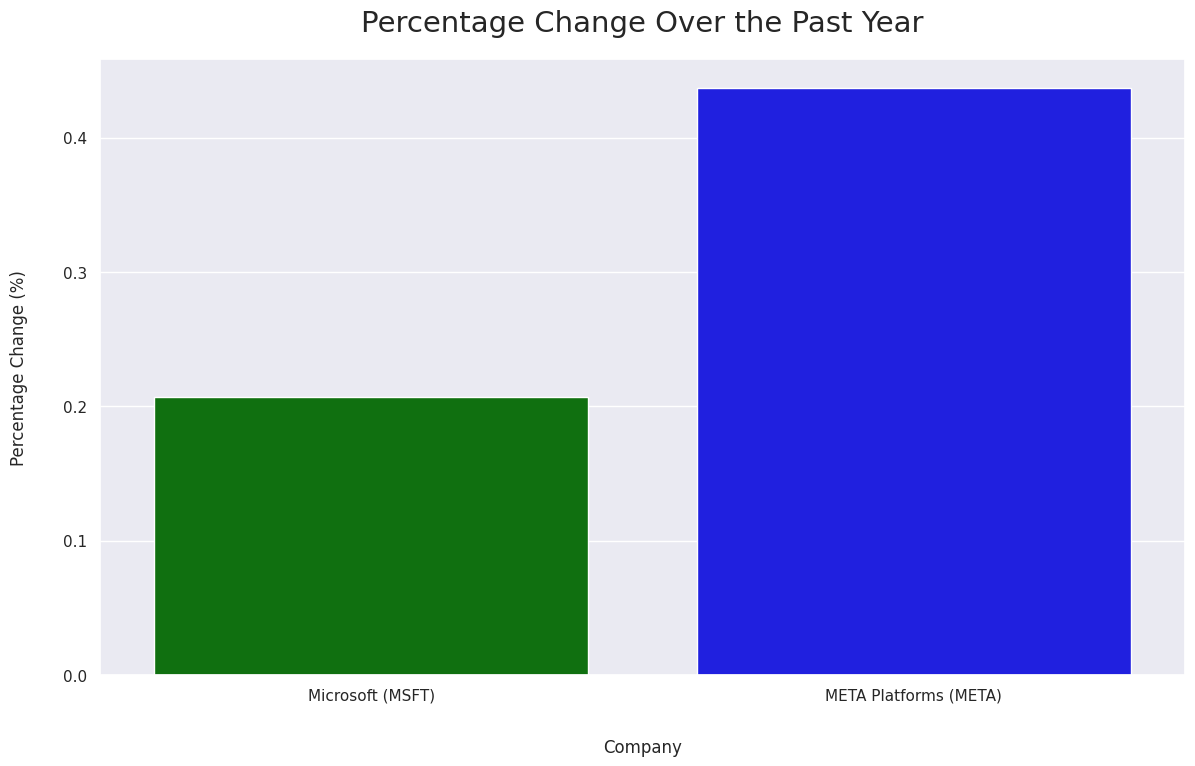

In [13]:
# Calculate and plot the percentage change in closing prices for FB and MSFT using bar plots

# For simplicity, this will be done on the past year data collected already:
msft_percentage = msft_year_data['Close'].pct_change().mean() * 100
meta_percentage = meta_year_data['Close'].pct_change().mean() * 100

change_data = pd.DataFrame({
    'Company': ['Microsoft (MSFT)', 'META Platforms (META)'],
    'Percentage Change': [msft_percentage, meta_percentage]
})

fig, ax = plt.subplots(figsize=(14,8))

ax.set_title('Percentage Change Over the Past Year', pad=20, fontsize=21)
ax.set_xlabel('Company', labelpad=25)
ax.set_ylabel('Percentage Change (%)', labelpad=25)
sns.barplot(x='Company', y='Percentage Change', hue='Company', data=change_data, palette=['green', 'blue'])

plt.show()

# Visualize your findings

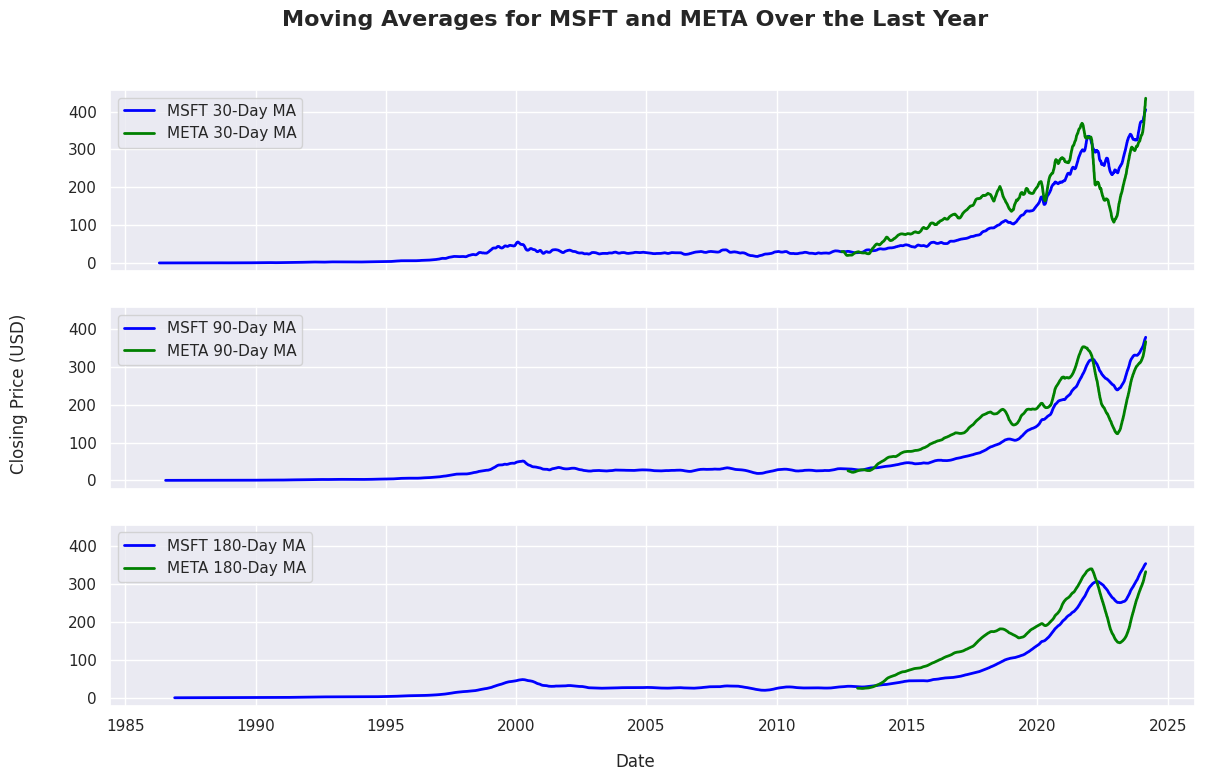

In [14]:
# Visualize the moving averages for FB and MSFT to identify trends over time
# Base the moving averages on 30 days, 90 days and 180 days

# Calculate moving averages
msft_data['30d'] = msft_data['Close'].rolling(window=30).mean()
msft_data['90d'] = msft_data['Close'].rolling(window=90).mean()
msft_data['180d'] = msft_data['Close'].rolling(window=180).mean()

meta_data['30d'] = meta_data['Close'].rolling(window=30).mean()
meta_data['90d'] = meta_data['Close'].rolling(window=90).mean()
meta_data['180d'] = meta_data['Close'].rolling(window=180).mean()

# Filter the days:
end_date = us_market_data['Date'].max()
start_date = end_date - pd.DateOffset(months=1)


fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True, sharey=True)


axes[0].plot(msft_data['30d'], label='MSFT 30-Day MA', color='blue', linewidth=2)
axes[0].plot(meta_data['30d'], label='META 30-Day MA', color='green', linewidth=2)
axes[0].legend()

axes[1].plot(msft_data['90d'], label='MSFT 90-Day MA', color='blue', linewidth=2)
axes[1].plot(meta_data['90d'], label='META 90-Day MA', color='green', linewidth=2)
axes[1].legend()

axes[2].plot(msft_data['180d'], label='MSFT 180-Day MA', color='blue', linewidth=2)
axes[2].plot(meta_data['180d'], label='META 180-Day MA', color='green', linewidth=2)
axes[2].legend()

# Add a main title to the figure:
fig.suptitle('Moving Averages for MSFT and META Over the Last Year', fontsize=16, fontweight='bold')

# Set common labels
fig.text(0.5, 0.04, 'Date', ha='center', va='center', fontsize=12)
fig.text(0.06, 0.5, 'Closing Price (USD)', ha='center', va='center', rotation='vertical', fontsize=12)

plt.show()

# Visualize your findings

###**Comparative Analysis**

<ipython-input-15-38569051044b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_market_data['Market Index'] = us_market_data['Mkt-RF'] + us_market_data['RF']


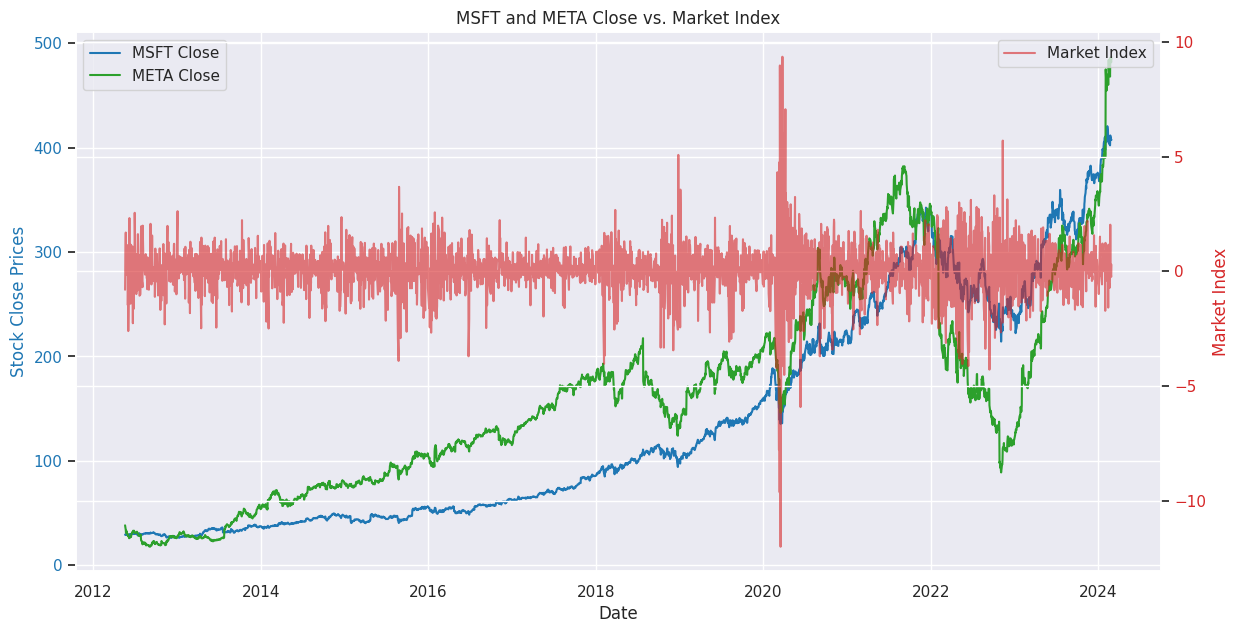

In [15]:
# Compare the closing prices of FB and MSFT with the US market from the CSV file using dual-axis line plots

# Find common date range:
common_start = max(msft_data.index.min(), meta_data.index.min(), us_market_data['Date'].min())
common_end = min(msft_data.index.max(), meta_data.index.max(), us_market_data['Date'].max())

# Filter each dataset to the common period:
msft_data = msft_data.loc[common_start:common_end]
meta_data = meta_data.loc[common_start:common_end]
us_market_data = us_market_data[(us_market_data['Date'] >= common_start) & (us_market_data['Date'] <= common_end)]

# Prepare market index (assuming 'Mkt-RF' and 'RF' are columns in us_market_data):
us_market_data['Market Index'] = us_market_data['Mkt-RF'] + us_market_data['RF']

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting MSFT and META on the primary axis:
color_msft = 'tab:blue'
color_meta = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Close Prices', color=color_msft)
line1, = ax1.plot(msft_data.index, msft_data['Close'], color=color_msft, label='MSFT Close')
line2, = ax1.plot(meta_data.index, meta_data['Close'], color=color_meta, label='META Close')
ax1.tick_params(axis='y', labelcolor=color_msft)
ax1.legend(handles=[line1, line2], loc='upper left')

# Create a second y-axis for the market data:
ax2 = ax1.twinx()
color_market = 'tab:red'
ax2.set_ylabel('Market Index', color=color_market)
line3, = ax2.plot(us_market_data['Date'], us_market_data['Market Index'], color=color_market, label='Market Index', alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color_market)
ax2.legend(handles=[line3], loc='upper right')

plt.title('MSFT and META Close vs. Market Index')
plt.show()

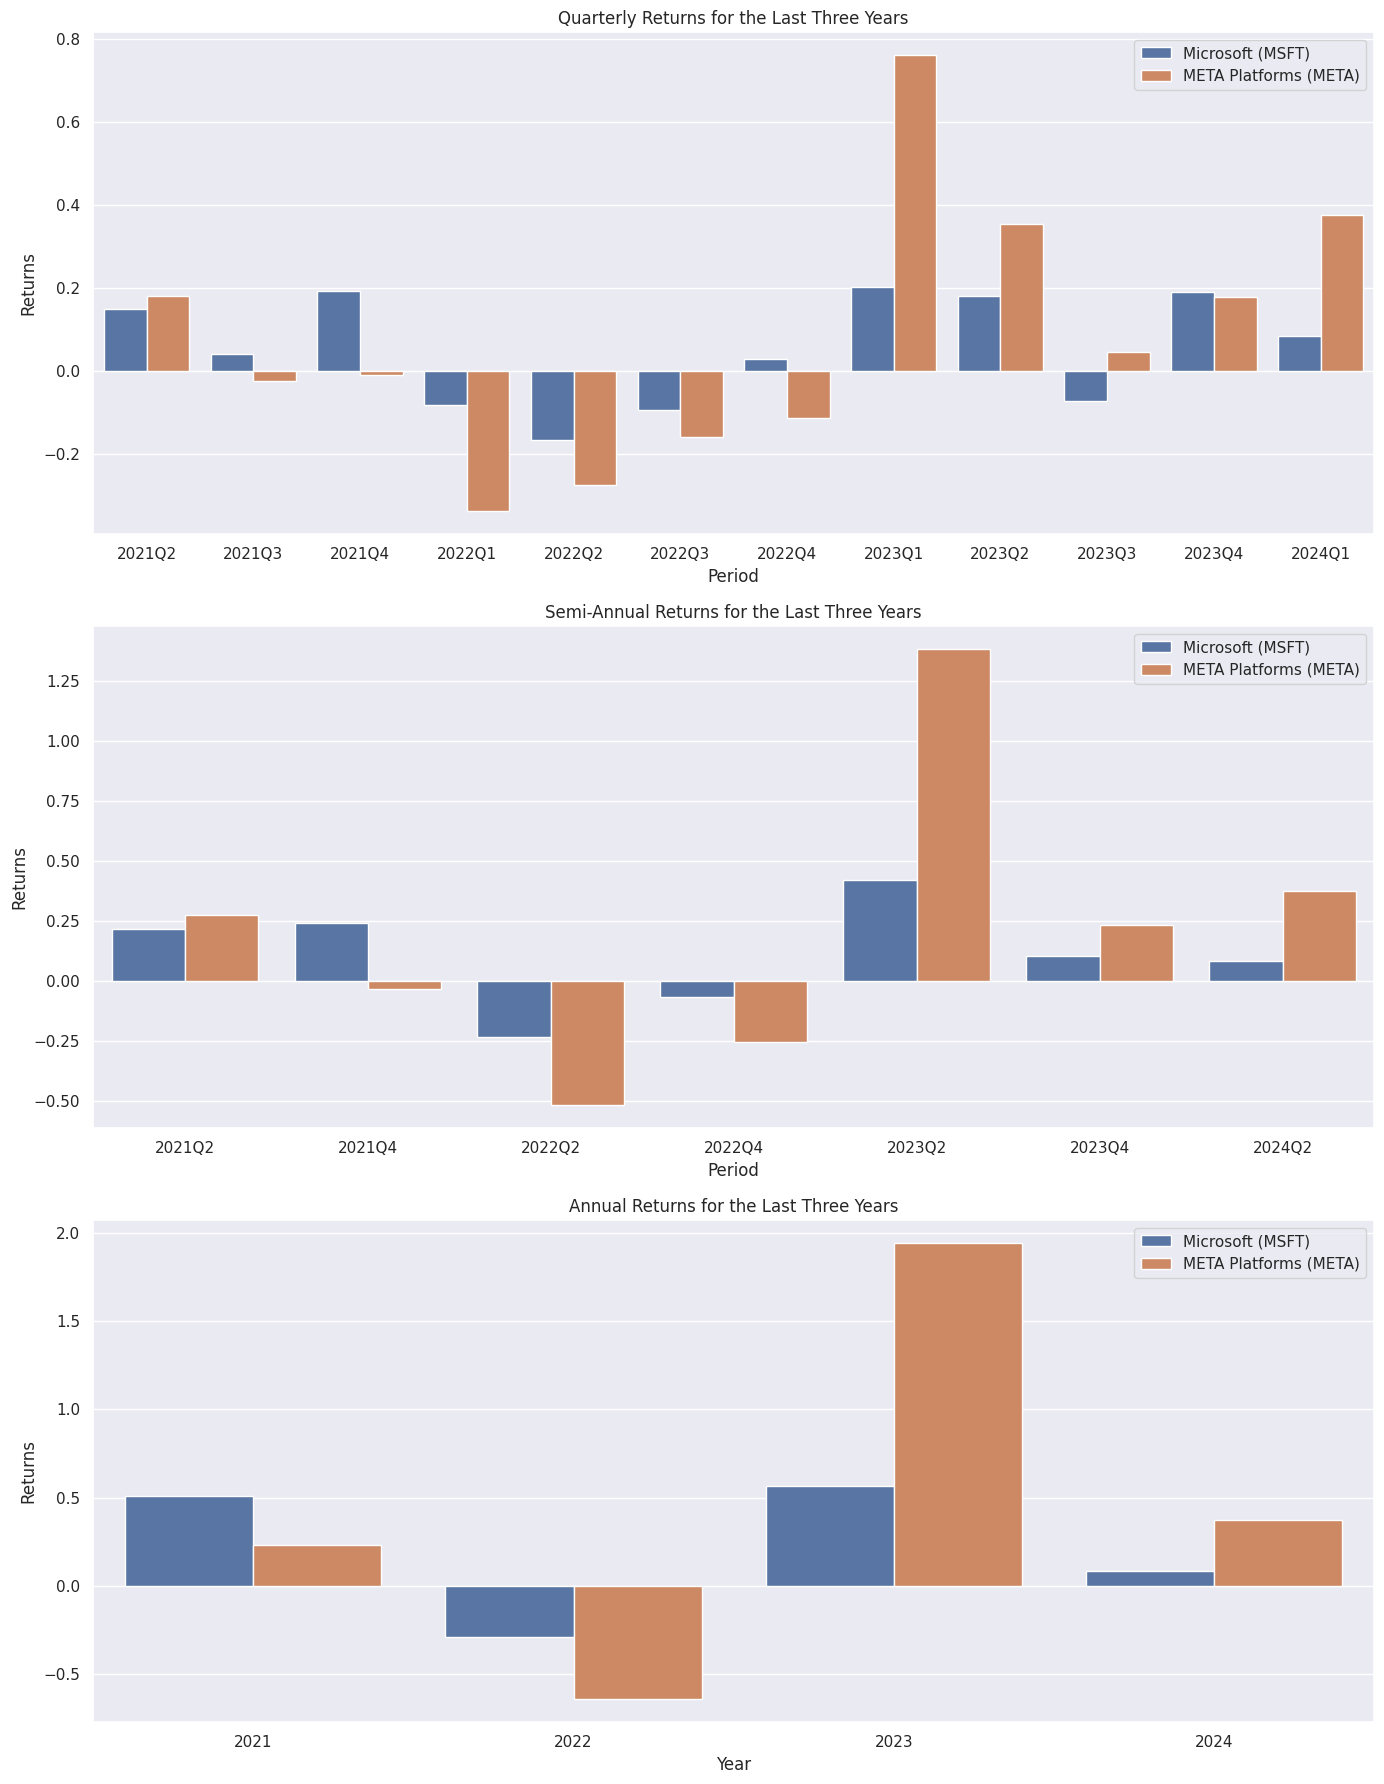

In [16]:
# Plot the daily returns for FB and MSFT using bar charts into 1 plot space
# Do the monthly and annual returns too
# Hints: Use msft_hist.pct_change().dropna()to calculate daily returns
# Use msft_hist.resample('M').ffill().pct_change().dropna() for monthly returns
# Use msft_hist.resample('Y').ffill().pct_change().dropna() for annual returns

# After experimentation, a reduced the range of year ans resample daily data to quarterly and monthly data to semi-annual:
quarterly_msft = msft_data['Close'].resample('Q').ffill().pct_change().dropna()
quarterly_meta = meta_data['Close'].resample('Q').ffill().pct_change().dropna()
semi_annual_msft = msft_data['Close'].resample('2Q').ffill().pct_change().dropna()
semi_annual_meta = meta_data['Close'].resample('2Q').ffill().pct_change().dropna()
annual_msft = msft_data['Close'].resample('Y').ffill().pct_change().dropna()
annual_meta = meta_data['Close'].resample('Y').ffill().pct_change().dropna()

# Current date and date three years ago for filtering
current_date = pd.to_datetime('today')
three_years_ago = current_date - pd.DateOffset(years=3)

# Filter the data for the last three years
quarterly_msft = quarterly_msft[quarterly_msft.index >= three_years_ago]
quarterly_meta = quarterly_meta[quarterly_meta.index >= three_years_ago]
semi_annual_msft = semi_annual_msft[semi_annual_msft.index >= three_years_ago]
semi_annual_meta = semi_annual_meta[semi_annual_meta.index >= three_years_ago]
annual_msft = annual_msft[annual_msft.index >= three_years_ago]
annual_meta = annual_meta[annual_meta.index >= three_years_ago]

# Prepare data for plotting
def prepare_returns_df(data_msft, data_meta, label):
    df_msft = data_msft.reset_index()
    df_meta = data_meta.reset_index()
    df_msft.columns = ['Date', 'Returns']
    df_meta.columns = ['Date', 'Returns']
    df_msft['Company'] = 'Microsoft (MSFT)'
    df_meta['Company'] = 'META Platforms (META)'
    returns = pd.concat([df_msft, df_meta])
    returns['Period'] = returns['Date'].dt.to_period(label)
    return returns

quarterly_returns = prepare_returns_df(quarterly_msft, quarterly_meta, 'Q')
semi_annual_returns = prepare_returns_df(semi_annual_msft, semi_annual_meta, '2Q')
annual_returns = prepare_returns_df(annual_msft, annual_meta, 'Y')

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=False)

# Quarterly Returns - Bar Plot
sns.barplot(x='Period', y='Returns', hue='Company', data=quarterly_returns, ax=axes[0])
axes[0].set_title('Quarterly Returns for the Last Three Years')
axes[0].set_ylabel('Returns')
axes[0].legend().set_title('')

# Semi-Annual Returns - Bar Plot
sns.barplot(x='Period', y='Returns', hue='Company', data=semi_annual_returns, ax=axes[1])
axes[1].set_title('Semi-Annual Returns for the Last Three Years')
axes[1].set_ylabel('Returns')
axes[1].legend().set_title('')

# Annual Returns - Bar Plot
sns.barplot(x='Period', y='Returns', hue='Company', data=annual_returns, ax=axes[2])
axes[2].set_title('Annual Returns for the Last Three Years')
axes[2].set_ylabel('Returns')
axes[2].set_xlabel('Year')
axes[2].legend().set_title('')

plt.tight_layout()
plt.show()

# Visualize your findings

# **Statistics and Probability**

This section aims to quantify the risk, distribution, and correlation of stock returns, providing a statistical backbone to our analysis. We calculate monthly returns and assess their volatility and distribution, examining metrics like skewness and kurtosis to understand deviations from the normal distribution. This offers clues into the risk and predictability of stock investments.

Correlation analysis between Facebook, Microsoft, and the US market sheds light on the interconnectedness of these stocks and their susceptibility to broader market movements. Hypothesis testing, particularly through the use of T-tests, helps us statistically infer differences in average returns, providing a basis for investment decisions. Additionally, calculating beta values for each stock relative to the market enables us to assess their market sensitivity and risk profile, crucial for portfolio management.

### **Hypothesis Testing**

In [17]:
# Conduct hypothesis testing to see if average returns of FB and MSFT are significantly different from the US market

# Null Hypothesis (H0): The mean return of the stock (MSFT or META) is equal to the mean return of the market.
# Alternative Hypothesis (H1): The mean return of the stock (MSFT or META) is not equal to the mean return of the market.

# Conduct the t-test for MSFT vs. Market:
t_stat_msft, p_value_msft = stats.ttest_ind(msft_data['Close'], us_market_data['Mkt-RF'], equal_var=False)

# Conduct the t-test for META vs. Market:
t_stat_meta, p_value_meta = stats.ttest_ind(meta_data['Close'], us_market_data['Mkt-RF'], equal_var=False)

# Define the results in a dictionary format:
results = {
    'Stock': ['Microsoft (MSFT)', 'META Platforms (META)'],
    't-statistic': [t_stat_msft, t_stat_meta],
    'p-value': [p_value_msft, p_value_meta]
}

# Convert the dictionary into a pandas DataFrame:
results_df = pd.DataFrame(results)

# Set the 'Stock' column as the index:
results_df.set_index('Stock', inplace=True)

# Add a decision column based on the p-values with a significance level of 0.05:
alpha = 0.05
results_df['Decision'] = results_df['p-value'].apply(lambda x: 'Reject H0' if x < alpha else 'Fail to reject H0')

# Display the DataFrame
results_df

,t-statistic,p-value,Decision
Stock,,,
Microsoft (MSFT),69.849021,0.0,Reject H0
META Platforms (META),92.035300,0.0,Reject H0


### **Linear Regression**

In [18]:
# Run linear regression between both returns and check if the slope is statistically significant. If it is close to 1 then the Global US market and the chosen company behave in the same manner.
# Check the accuracy of your model.

# Setting 'Date' as index for us_market_data if not already:
if not isinstance(us_market_data.index, pd.DatetimeIndex):
    us_market_data.set_index('Date', inplace=True)

# Ensuring it's aligned properly with msft_data's index:
us_market_data.index = pd.to_datetime(us_market_data.index)

# Filter columns:
msft_close = msft_data[['Close']]
market_excess_returns = us_market_data[['Mkt-RF']]

# Align data using join:
aligned_data = msft_close.join(market_excess_returns, how='inner')

# Prepare X and y for regression:
X = sm.add_constant(aligned_data['Mkt-RF'])
y = aligned_data['Close']

# Fit the linear regression model:
model = sm.OLS(y, X).fit()

# Print the summary of the regression:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1726
Date:                Fri, 19 Apr 2024   Prob (F-statistic):              0.678
Time:                        23:06:04   Log-Likelihood:                -18031.
No. Observations:                2962   AIC:                         3.607e+04
Df Residuals:                    2960   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.7901      1.961     69.764      0.0

In [19]:
# Perform a T-test to statistically analyze if the average stock returns significantly differ from the market returns.
# This test could also help in checking if the slope of the returns is statistically close to 1

# 1. T-Test for Difference in Means (MSFT vs. Market)
# Extract the mean returns for MSFT and the market"
mean_msft = aligned_data['Close'].mean()
mean_market = aligned_data['Mkt-RF'].mean()

# Calculate the standard deviations and sample sizes:
std_msft = aligned_data['Close'].std()
std_market = aligned_data['Mkt-RF'].std()
n_msft = len(aligned_data['Close'])
n_market = len(aligned_data['Mkt-RF'])

# Calculate the t-statistic and p-value for the difference in means:
t_stat_means, p_value_means = stats.ttest_ind(aligned_data['Close'], aligned_data['Mkt-RF'], equal_var=False)

# 2. Test if the Slope is Statistically Close to 1
# Get the coefficient for 'Mkt-RF' and its standard error:
slope = model.params['Mkt-RF']
slope_stderr = model.bse['Mkt-RF']

# Calculate the t-statistic for the hypothesis that slope = 1:
t_stat_slope = (slope - 1) / slope_stderr

# Calculate the p-value for the two-tailed test:
p_value_slope = 2 * (1 - stats.t.cdf(np.abs(t_stat_slope), df=model.df_resid))

# Define the results in a dictionary format
results = {
    'Test': ['Difference in Means', 'Slope Test'],
    't-statistic': [t_stat_means, t_stat_slope],
    'p-value': [p_value_means, p_value_slope]
}

# Convert the dictionary into a pandas DataFrame
results_df = pd.DataFrame(results)

# Set the 'Test' column as the index
results_df.set_index('Test', inplace=True)

# Add a decision column based on the p-values with a significance level of 0.05
alpha = 0.05
results_df['Decision'] = results_df['p-value'].apply(lambda x: 'Reject H0' if x < alpha else 'Fail to reject H0')

# Display the DataFrame
results_df

,t-statistic,p-value,Decision
Test,,,
Difference in Means,69.849021,0.000000,Reject H0
Slope Test,-0.144879,0.884816,Fail to reject H0


### **Daily, Monthly and Annual Returns**

<ipython-input-20-d47e92123cf4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['Daily Returns'] = meta_data['Close'].pct_change()
<ipython-input-20-d47e92123cf4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['Month'] = meta_data.index.to_period('M')
<ipython-input-20-d47e92123cf4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

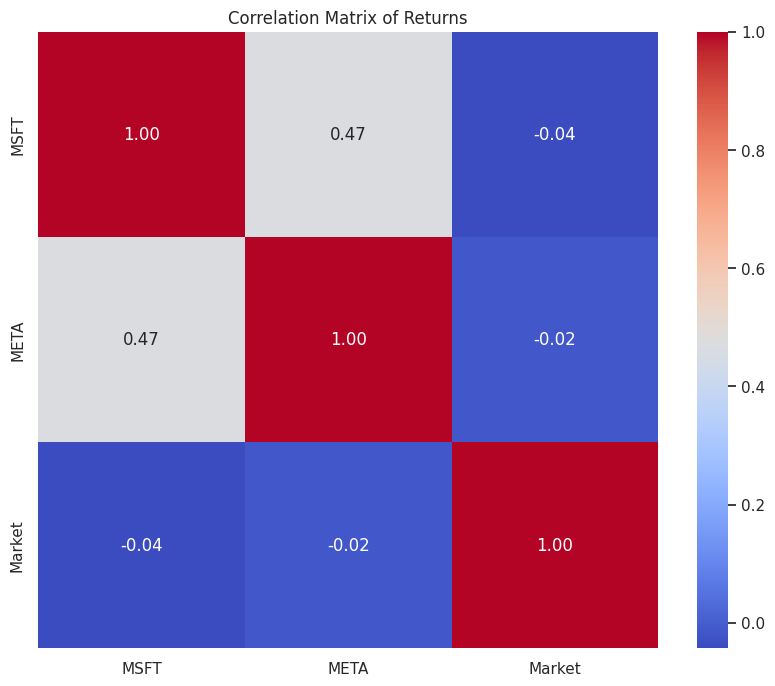

In [20]:
# Calculate the returns for FB and MSFT using the formula
# Return = (Today − Yesterday)/Today
# Aggregate these daily returns to get monthly and annual returns.

# Calculate daily returns for MSFT and META:
msft_data['Daily Returns'] = msft_data['Close'].pct_change()
meta_data['Daily Returns'] = meta_data['Close'].pct_change()

# Aggregate these to monthly and annual returns:
msft_data['Month'] = msft_data.index.to_period('M')
meta_data['Month'] = meta_data.index.to_period('M')

msft_monthly_returns = msft_data.groupby('Month')['Daily Returns'].sum()
meta_monthly_returns = meta_data.groupby('Month')['Daily Returns'].sum()

msft_annual_returns = msft_data.groupby(msft_data.index.year)['Daily Returns'].sum()
meta_annual_returns = meta_data.groupby(meta_data.index.year)['Daily Returns'].sum()

# Perform correlation analysis between FB and MSFT returns and then with the US market
# Use heatmap plots
us_market_data['Daily Returns'] = us_market_data['Mkt-RF'].pct_change()
us_market_data['Daily Returns'].sum()
# Combine the returns into a single DataFrame:
returns_data = pd.DataFrame({
    'MSFT': msft_data['Daily Returns'],
    'META': meta_data['Daily Returns'],
    'Market': us_market_data['Daily Returns']
}).dropna()  # Drop NA values for clean correlation analysis

# Calculate correlation matrix:
correlation_matrix = returns_data.corr()

# Plot the heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Returns')
plt.show()

In [21]:
# Examine the skewness and kurtosis of the monthly return distributions for FB and MSFT to understand their deviation from a normal distribution

skewness_msft = msft_monthly_returns.skew()
kurtosis_msft = msft_monthly_returns.kurtosis()

skewness_meta = meta_monthly_returns.skew()
kurtosis_meta = meta_monthly_returns.kurtosis()

print(f"MSFT Monthly Returns: Skewness = {skewness_msft}, Kurtosis = {kurtosis_msft}")
print(f"META Monthly Returns: Skewness = {skewness_meta}, Kurtosis = {kurtosis_meta}")


MSFT Monthly Returns: Skewness = 0.10780717185380091, Kurtosis = 0.36386747340373926
META Monthly Returns: Skewness = -0.19204864672298783, Kurtosis = 2.4632189418500814


# **Machine Learning**
The ML section leverages predictive modeling and clustering techniques to forecast future stock returns and uncover hidden patterns in stock behavior.
We employ hierarchical clustering to understand the relationship between FAANG and microsoft based on their financial data and market position, visualizing this through dendrograms. This analysis can highlight similarities in stock performance and market reactions.

Regression analysis forms the core of our predictive efforts, aiming to forecast future stock returns based on historical data and market growth. By evaluating the importance of different features, we gain insights into the factors most influential in driving stock returns. Model evaluation through cross-validation ensures the reliability and robustness of our predictive models, affirming their utility in real-world forecasting.

## <ins>**Clustering: Stock Performance and Stability** <ins><br>


### **Regression Analysis**

In [75]:
# Build and evaluate a predictive model to forecast the next month's return for FB and MSFT based on past returns and the US market's S&P 500 returns (Mkt-RF)

# Reload the Meta and MSFT data with 'Date' as a column:
meta_data_reset = meta_data.reset_index()
msft_data_reset = msft_data.reset_index()

# Merge Meta data with US market data:
meta_merged = pd.merge(meta_data_reset, us_market_data_reset[['Date', 'Mkt-RF']], on='Date', how='left')

# Merge MSFT data with US market data:
msft_merged = pd.merge(msft_data_reset, us_market_data_reset[['Date', 'Mkt-RF']], on='Date', how='left')

# Drop rows with any missing values in the columns of interest for clean datasets:
meta_cleaned = meta_merged.dropna(subset='Daily Returns')
msft_cleaned = msft_merged.dropna(subset='Daily Returns')

# Define the features and target for the regression models:
features = ['Daily Returns', '30d', '90d', '180d', 'Mkt-RF']
target = 'Next Month Return'

# Splitting the data for Meta:
X_meta = meta_cleaned[features]
y_meta = meta_cleaned[target]
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X_meta, y_meta, test_size=0.2, random_state=42)

# Splitting the data for MSFT:
X_msft = msft_cleaned[features]
y_msft = msft_cleaned[target]
X_train_msft, X_test_msft, y_train_msft, y_test_msft = train_test_split(X_msft, y_msft, test_size=0.2, random_state=42)

# Create and train the linear regression model for Meta:
model_meta = LinearRegression()
model_meta.fit(X_train_meta, y_train_meta)

# Predict on the testing set for Meta:
y_pred_meta = model_meta.predict(X_test_meta)
rmse_meta = mean_squared_error(y_test_meta, y_pred_meta, squared=False)

# Create and train the linear regression model for MSFT:
model_msft = LinearRegression()
model_msft.fit(X_train_msft, y_train_msft)

# Predict on the testing set for MSFT
y_pred_msft = model_msft.predict(X_test_msft)
rmse_msft = mean_squared_error(y_test_msft, y_pred_msft, squared=False)

# Output the RMSE results
print("RMSE for Meta: ", rmse_meta)
print("RMSE for Microsoft: ", rmse_msft)

# Explore the feature importance of your predictive model to identify which variables have the most influence on the forecasted returns

# Extracting coefficients for Meta:
meta_coefficients = pd.DataFrame(model_meta.coef_, index=features, columns=['Coefficient'])

# Extracting coefficients for MSFT:
msft_coefficients = pd.DataFrame(model_msft.coef_, index=features, columns=['Coefficient'])

(meta_coefficients, msft_coefficients)


RMSE for Meta:  0.02654022075956968
RMSE for Microsoft:  0.017647675015026395


(               Coefficient
 Daily Returns     0.014333
 30d              -0.000008
 90d               0.000055
 180d             -0.000059
 Mkt-RF           -0.002296,
                Coefficient
 Daily Returns    -0.004037
 30d              -0.000036
 90d               0.000020
 180d              0.000019
 Mkt-RF           -0.002663)

The most influential variable for both models seems to be the Mkt-RF, indicating that market conditions significantly affect the forecasted returns.
The Daily Returns also show significant influence but with opposite effects between the two models.
The moving averages (30d, 90d, 180d) have very small coefficients, suggesting their impact is much less pronounced compared to daily changes and market excess returns.

### **Hierarchical Clustering**

In [85]:
# Use hierarchical clustering to understand the relationship between FAANG companies and MSFT
# The relationship will be based on the following features below
# Features: Market value, stock returns, price to earnings ratio, dividend yield and return on equity.

# Define the ticker symbols for FAANG companies and Microsoft:
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOGL", "MSFT"]

# Fetch data from Yahoo Finance:
data = yf.download(tickers, start="2022-01-01", end="2023-01-01")['Adj Close']

# Calculate annual stock returns:
annual_returns = data.pct_change().mean() * 250

# Fetch financial metrics
financials = {ticker: yf.Ticker(ticker) for ticker in tickers}
pe_ratios = pd.Series({ticker: financials[ticker].info.get('trailingPE', np.nan) for ticker in tickers})
dividend_yields = pd.Series({ticker: financials[ticker].info.get('dividendYield', 0) for ticker in tickers})
market_values = pd.Series({ticker: financials[ticker].info.get('marketCap', np.nan) for ticker in tickers})
roes = pd.Series({ticker: financials[ticker].info.get('returnOnEquity', np.nan) for ticker in tickers})

# Create a DataFrame:
features_df = pd.DataFrame({
    'Market Value': market_values,
    'Stock Returns': annual_returns,
    'P/E Ratio': pe_ratios,
    'Dividend Yield': dividend_yields,
    'ROE': roes
})


[*********************100%%**********************]  6 of 6 completed


### **Dendrogram Visualization**

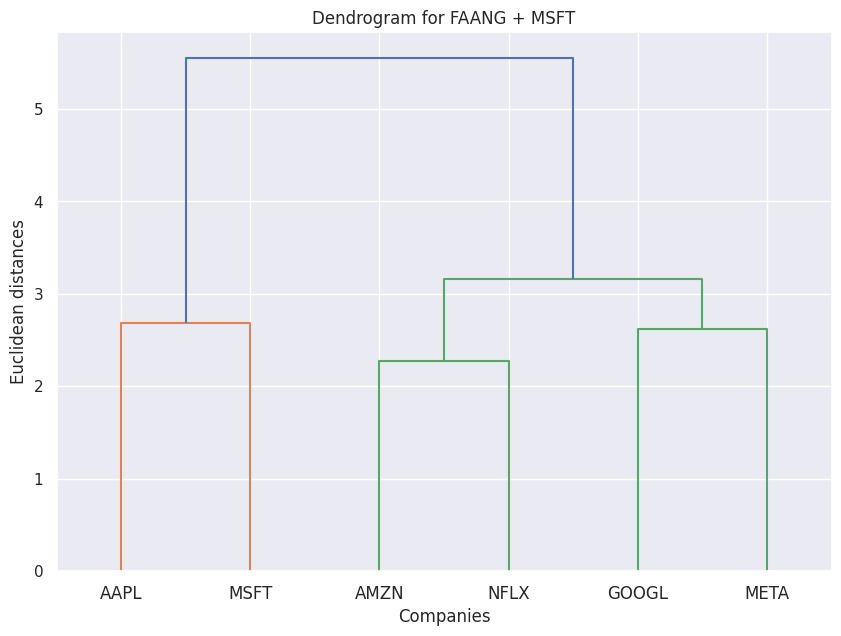

In [86]:
# Create a dendrogram to visualize the clustering and identify the relativity between FAANG and MSFT
# Hints: tickers for FAANG = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']
# Based on the selected features at the "Hierarchical Clustering" stage

# Data normalization:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Hierarchical clustering:
linked = linkage(features_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=features_df.dropna().index, orientation='top')
plt.title('Dendrogram for FAANG + MSFT')
plt.xlabel('Companies')
plt.ylabel('Euclidean distances')
plt.show()

Cluster all the companies into a Dendogram (example: data-to-viz.com) 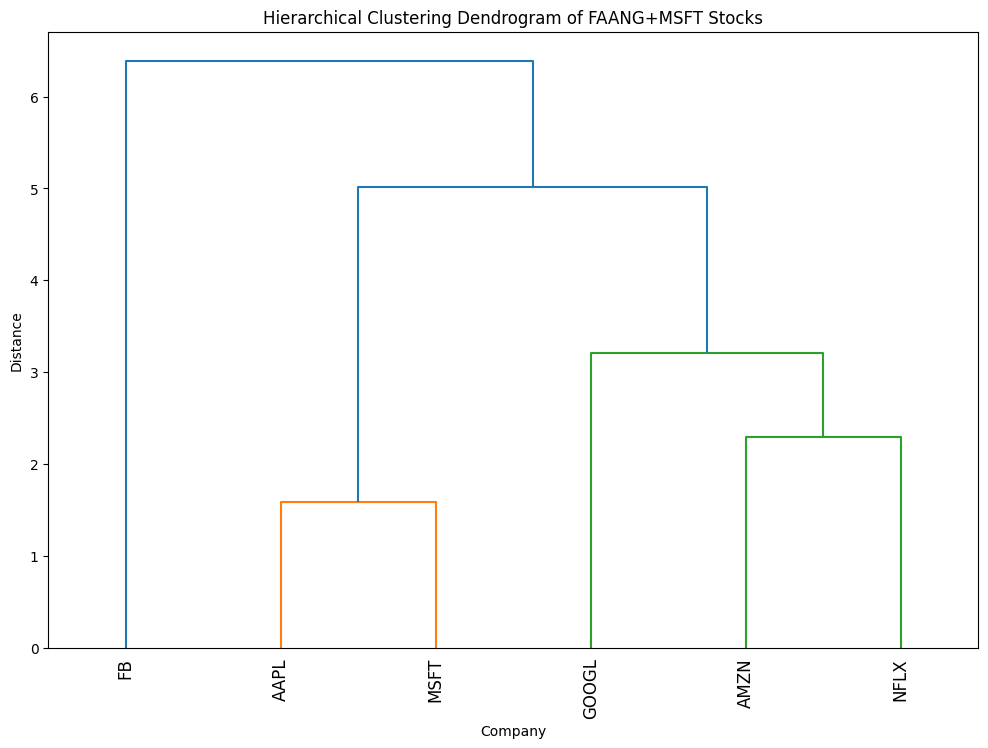
